## Parameters 
- M = number of balls
- R = number of bins

In [23]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [248]:
def simu(M, R, x):
    R_arr = [0 for i in range(R)] 
    for i in range(M):
        position = random.randint(0, R-1)
        R_arr[position] += 1

    x_cnt = 0
    
    if R_arr[0] == x:
            x_cnt += 1
#     for idx, R in enumerate(R_arr):
#         if R == x:
#             x_cnt += 1
    return x_cnt

$R \frac{\left(\frac{M}{R}\right)^x e^{-\frac{M}{R}}}{x!}$

In [249]:
def ana(M, R, x):
    return ((M / R) ** x) * math.exp(-M/R) / math.factorial(x)

In [250]:
def getAna_Simu_ApproxError(R, x, sample):
    # 1, 2, ... 10, 20, 30, ... 100, 200, 300, ... 1000
    m_list_simu = np.concatenate([np.arange(1, 11, 1), np.arange(20, 110, 10), np.arange(200, 1100, 100)])
    result_arr_simu = [0 for i in range(28)]
    for idx, m in enumerate(m_list_simu):
        x_cnt = 0
        for i in range(sample):
            x_cnt += simu(M=m, R=R, x=x)
        result_arr_simu[idx] = x_cnt / sample

    m_list_ana = [i+1 for i in range(1000)]
    result_arr_ana = [0 for i in range(1000)]

    for idx, m in enumerate(m_list_ana):
        result_arr_ana[idx] = ana(M=m, R=R, x=x)
        
    approx_error = [0 for i in range(len(m_list_simu))]
    for idx, m in enumerate(m_list_simu):
#         approx_error[idx] = abs((result_arr_simu[idx] - result_arr_ana[m-1]) / R) * 100
        approx_error[idx] = abs((result_arr_simu[idx] - result_arr_ana[m-1]) / result_arr_ana[m-1]) * 100
#         approx_error[idx] = abs(result_arr_simu[idx] - result_arr_ana[m-1])
    
    return(result_arr_ana, result_arr_simu, approx_error)


In [251]:
def getAna_Simu_ApproxError_With_R(R_list_simu, R_list_ana, x, M, sample):
    result_arr_simu = [0 for i in range(len(R_list_simu))]
    result_arr_ana = [0 for i in range(len(R_list_ana))]
    # 10, 20,... R
    for idx, R in enumerate(R_list_simu):
        x_cnt = 0
        for i in range(sample):
            x_cnt += simu(M=M, R=R, x=x)
        result_arr_simu[idx] = x_cnt / sample

    for idx, R in enumerate(R_list_ana):
        result_arr_ana[idx] = ana(M=M, R=R, x=x)
        
    approx_error = [0 for i in range(len(R_list_simu))]
    for idx, m in enumerate(R_list_simu):
#         approx_error[idx] = abs((result_arr_simu[idx] - result_arr_ana[m-1]) / R) * 100
        approx_error[idx] = abs((result_arr_simu[idx] - result_arr_ana[m-1]) / result_arr_ana[m-1]) * 100
#         approx_error[idx] = abs(result_arr_simu[idx] - result_arr_ana[m-1])
    return(result_arr_ana, result_arr_simu, approx_error)


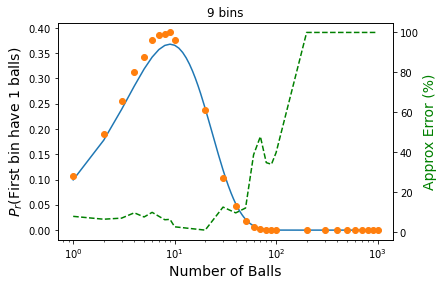

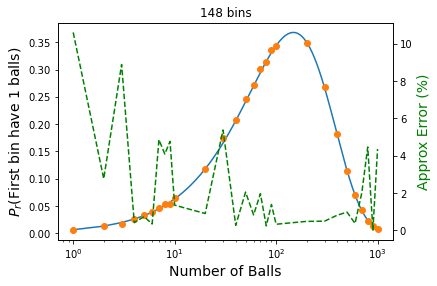

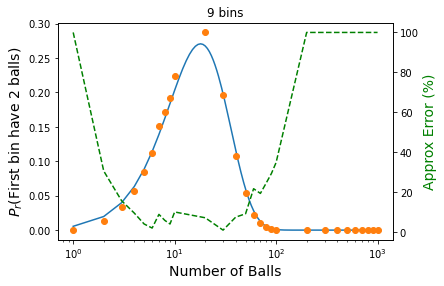

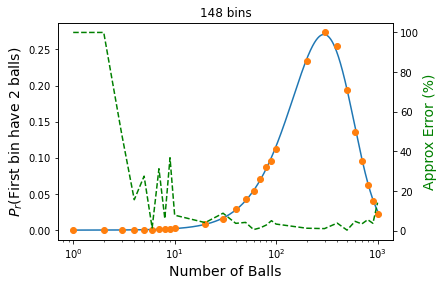

In [272]:
for x in [1,2]:
    for R in [9,148]:
        m_list_simu = np.concatenate([np.arange(1, 11, 1), np.arange(20, 110, 10), np.arange(200, 1100, 100)])
        m_list_ana = [i+1 for i in range(1000)]
        
        result_arr_ana, result_arr_simu, approx_error = getAna_Simu_ApproxError(R=R, x=x, sample=10000)

        # Create a figure and a primary axis
        fig, ax1 = plt.subplots()
        
        ax1.set_xscale('log')
        
        ax1.plot(m_list_ana, result_arr_ana, label='Poisson Approx result')
        ax1.plot(m_list_simu, result_arr_simu, marker="o", linestyle="None", label='Simulation result')

        ax1.set_xlabel("Number of Balls", fontsize = 14)
        ax1.set_ylabel(f'$P_r$(First bin have {x} balls)', fontsize = 14)
#         plt.legend(loc='center right', bbox_to_anchor=(0.9, 1.8), fontsize = 12)

        ax2 = ax1.twinx()
        ax2.plot(m_list_simu, approx_error, linestyle="--", color='g', label='approx error')
        ax2.set_ylabel(f'Approx Error (%)', color='g', fontsize = 14)
#         ax2.set_ylim([0, 100])

        plt.title(f'{R} bins')
        plt.show()

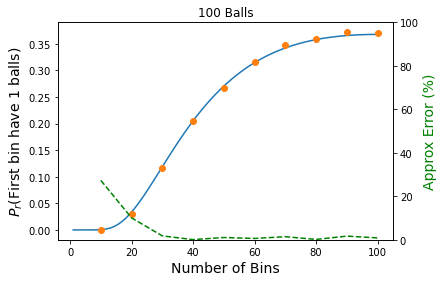

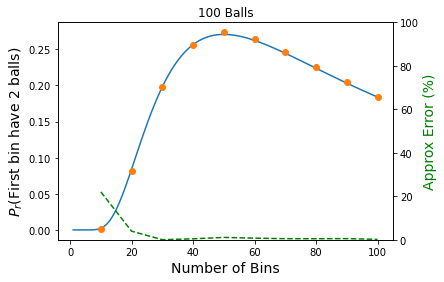

In [259]:
for x in [1,2]:
    M=100
    R_list_ana = [i+1 for i in range(100)]
    R_list_simu = [10,20,30,40,50,60,70,80,90,100]
    result_arr_ana, result_arr_simu, approx_error = getAna_Simu_ApproxError_With_R(R_list_simu=R_list_simu, R_list_ana=R_list_ana, x=x, M=M, sample=100000)

    # Create a figure and a primary axis
    fig, ax1 = plt.subplots()

    ax1.plot(R_list_ana, result_arr_ana, label='Poisson Approx result')
    ax1.plot(R_list_simu, result_arr_simu, marker="o", linestyle="None", label='Simulation result')

    ax1.set_xlabel("Number of Bins", fontsize = 14)
    ax1.set_ylabel(f'$P_r$(First bin have {x} balls)', fontsize = 14)
#         plt.legend(loc='center right', bbox_to_anchor=(0.9, 1.8), fontsize = 12)

    ax2 = ax1.twinx()
    ax2.plot(R_list_simu, approx_error, linestyle="--", color='g', label='approx error')
    ax2.set_ylabel(f'Approx Error (%)', color='g', fontsize = 14)
    ax2.set_ylim([0, 100])

    plt.title(f'{M} Balls')
    plt.show()

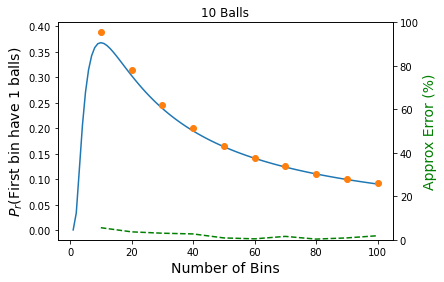

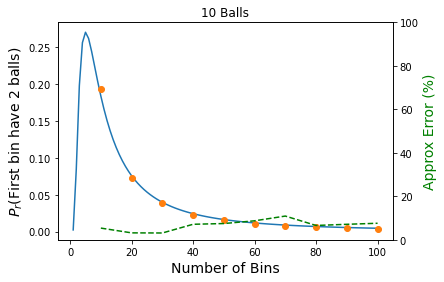

In [268]:
for x in [1,2]:
    M=10
    R_list_ana = [i+1 for i in range(100)]
    R_list_simu = [10,20,30,40,50,60,70,80,90,100]
    result_arr_ana, result_arr_simu, approx_error = getAna_Simu_ApproxError_With_R(R_list_simu=R_list_simu, R_list_ana=R_list_ana, x=x, M=M, sample=100000)

    # Create a figure and a primary axis
    fig, ax1 = plt.subplots()

    ax1.plot(R_list_ana, result_arr_ana, label='Poisson Approx result')
    ax1.plot(R_list_simu, result_arr_simu, marker="o", linestyle="None", label='Simulation result')

    ax1.set_xlabel("Number of Bins", fontsize = 14)
    ax1.set_ylabel(f'$P_r$(First bin have {x} balls)', fontsize = 14)
#         plt.legend(loc='center right', bbox_to_anchor=(0.9, 1.8), fontsize = 12)

    ax2 = ax1.twinx()
    ax2.plot(R_list_simu, approx_error, linestyle="--", color='g', label='approx error')
    ax2.set_ylabel(f'Approx Error (%)', color='g', fontsize = 14)
    ax2.set_ylim([0, 100])

    plt.title(f'{M} Balls')
    plt.show()